<a href="https://colab.research.google.com/github/sanjeev-project/vanadium-flow-battery-project/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual.

rent: The individual is currently renting a property.

mortgage: The individual has a mortgage on the property they own.

own: The individual owns their home outright.

other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.

A: The borrower has a high creditworthiness, indicating low risk.
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
C: The borrower's creditworthiness is moderate.
D: The borrower is considered to have higher risk compared to previous grades.
E: The borrower's creditworthiness is lower, indicating a higher risk.
F: The borrower poses a significant credit risk.
G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.

0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.

Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.

cb_preson_cred_hist_length: The length of credit history for the individual.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: >

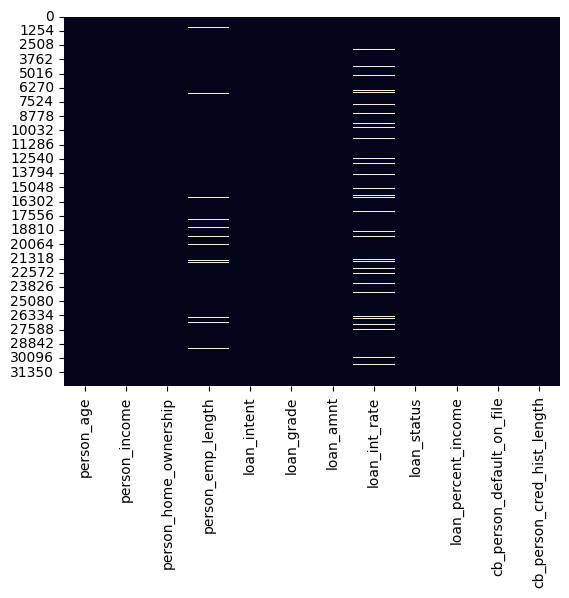

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

<Axes: ylabel='loan_int_rate'>

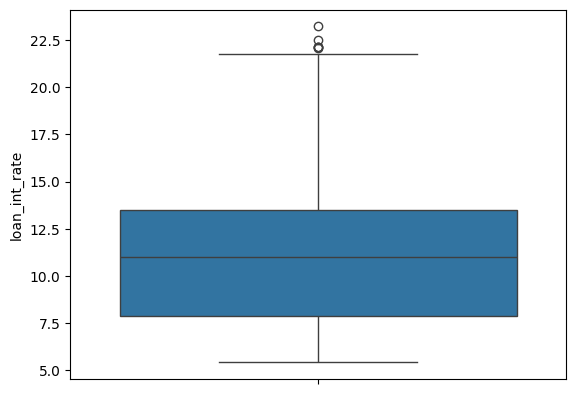

In [ ]:
sns.boxplot(df['loan_int_rate'])

<Axes: ylabel='person_emp_length'>

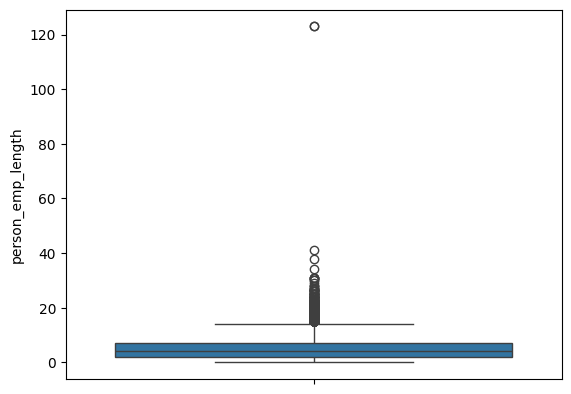

In [ ]:
sns.boxplot(df['person_emp_length'])

In [ ]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [ ]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

<Axes: >

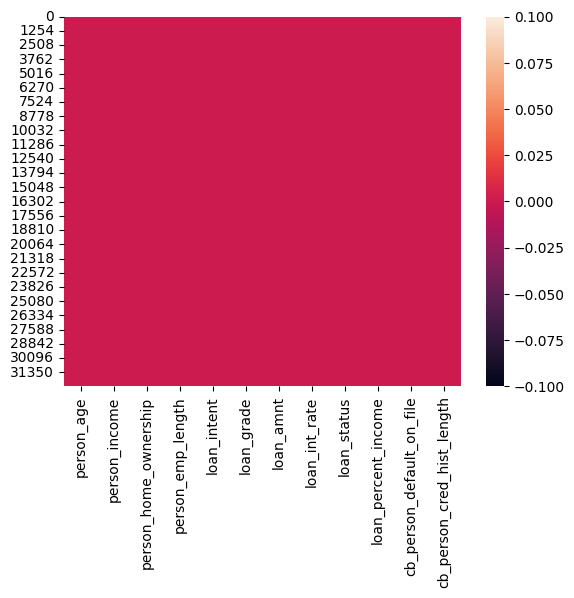

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.duplicated().sum()

165

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32416, 12)

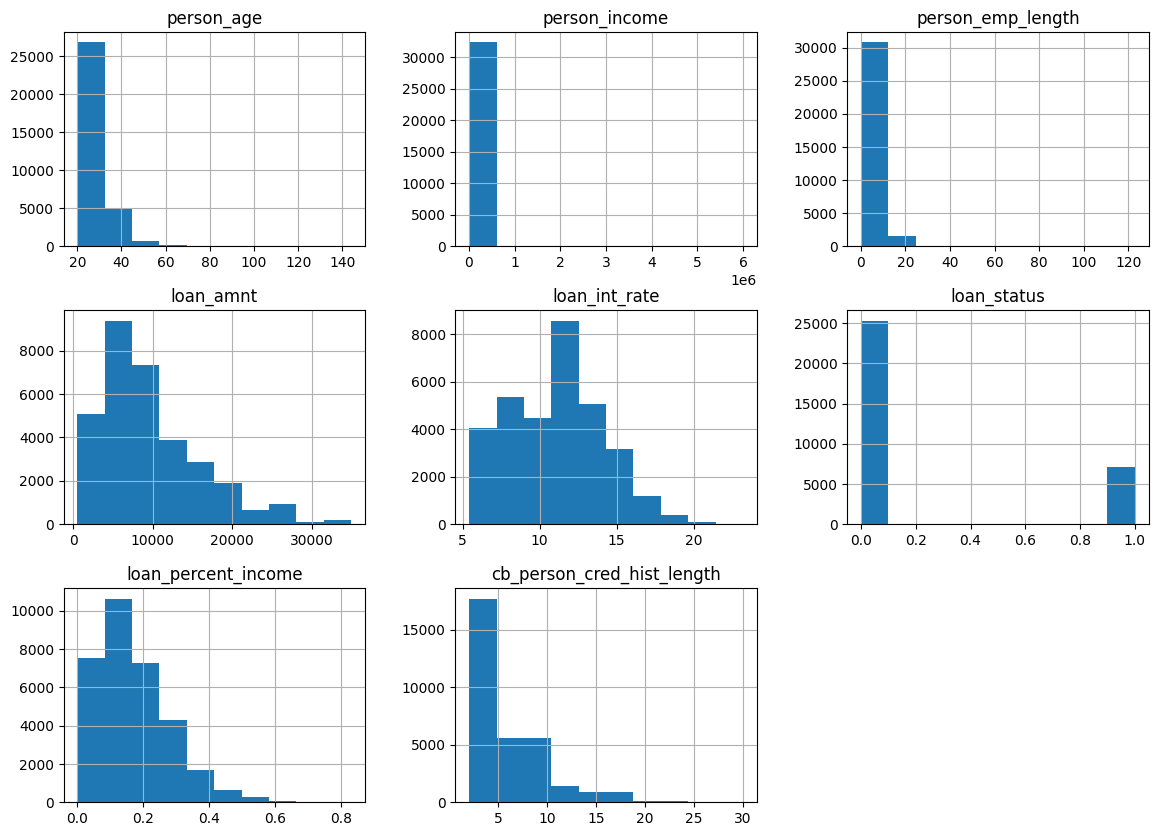

In [ ]:
df.hist(figsize=(14,10))
plt.show()

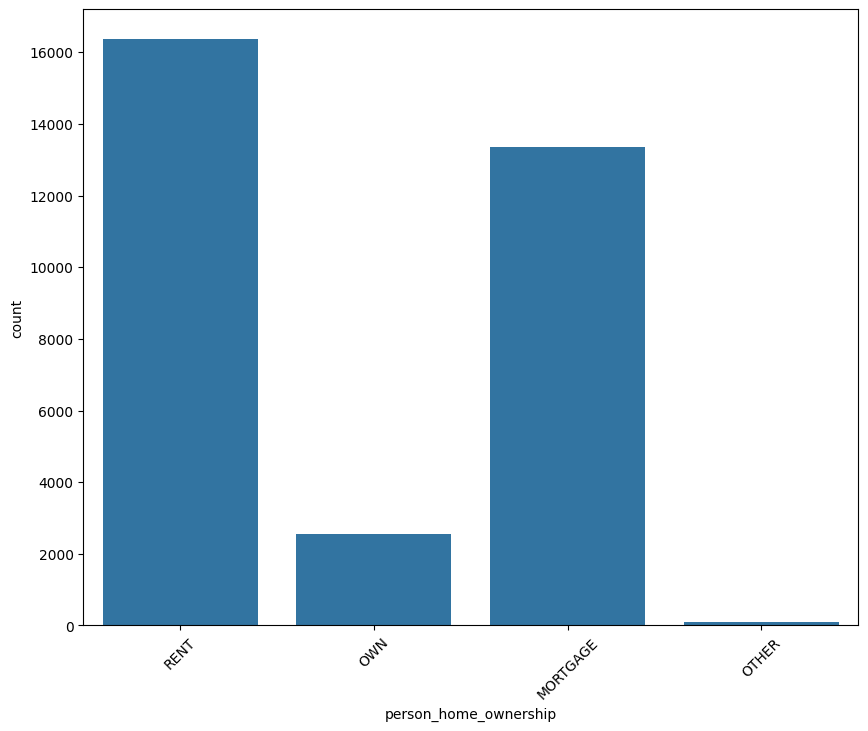

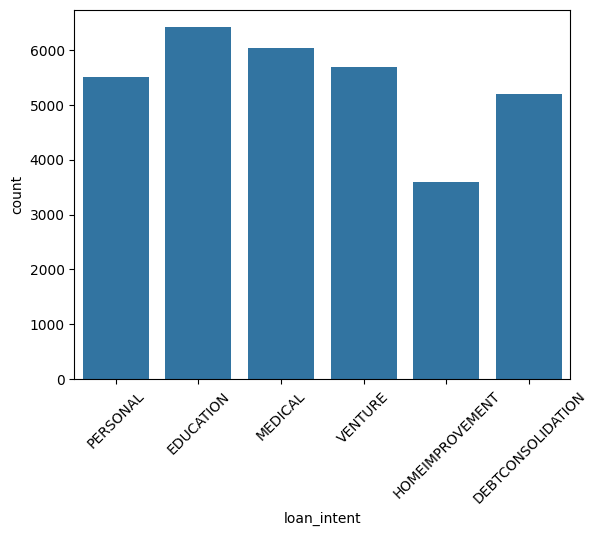

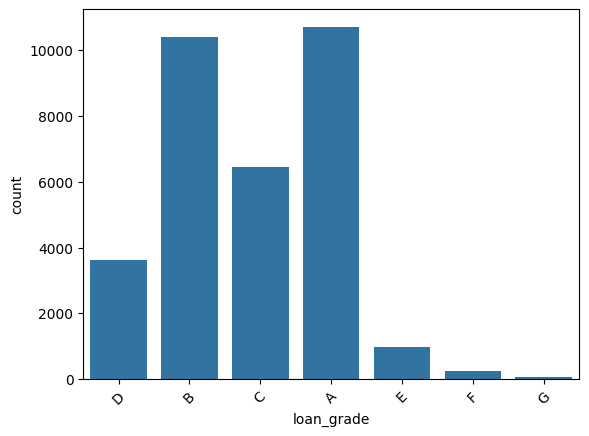

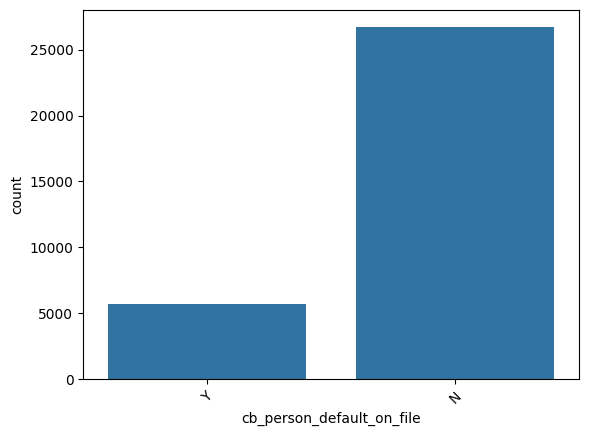

In [ ]:
plt.figure(figsize=(10, 8))
for col in ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]:
    sns.countplot(data= df, x=col)
    plt.xticks(rotation= 45)
    plt.show()

In [ ]:
num_col_df = df._get_numeric_data()
num_col_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


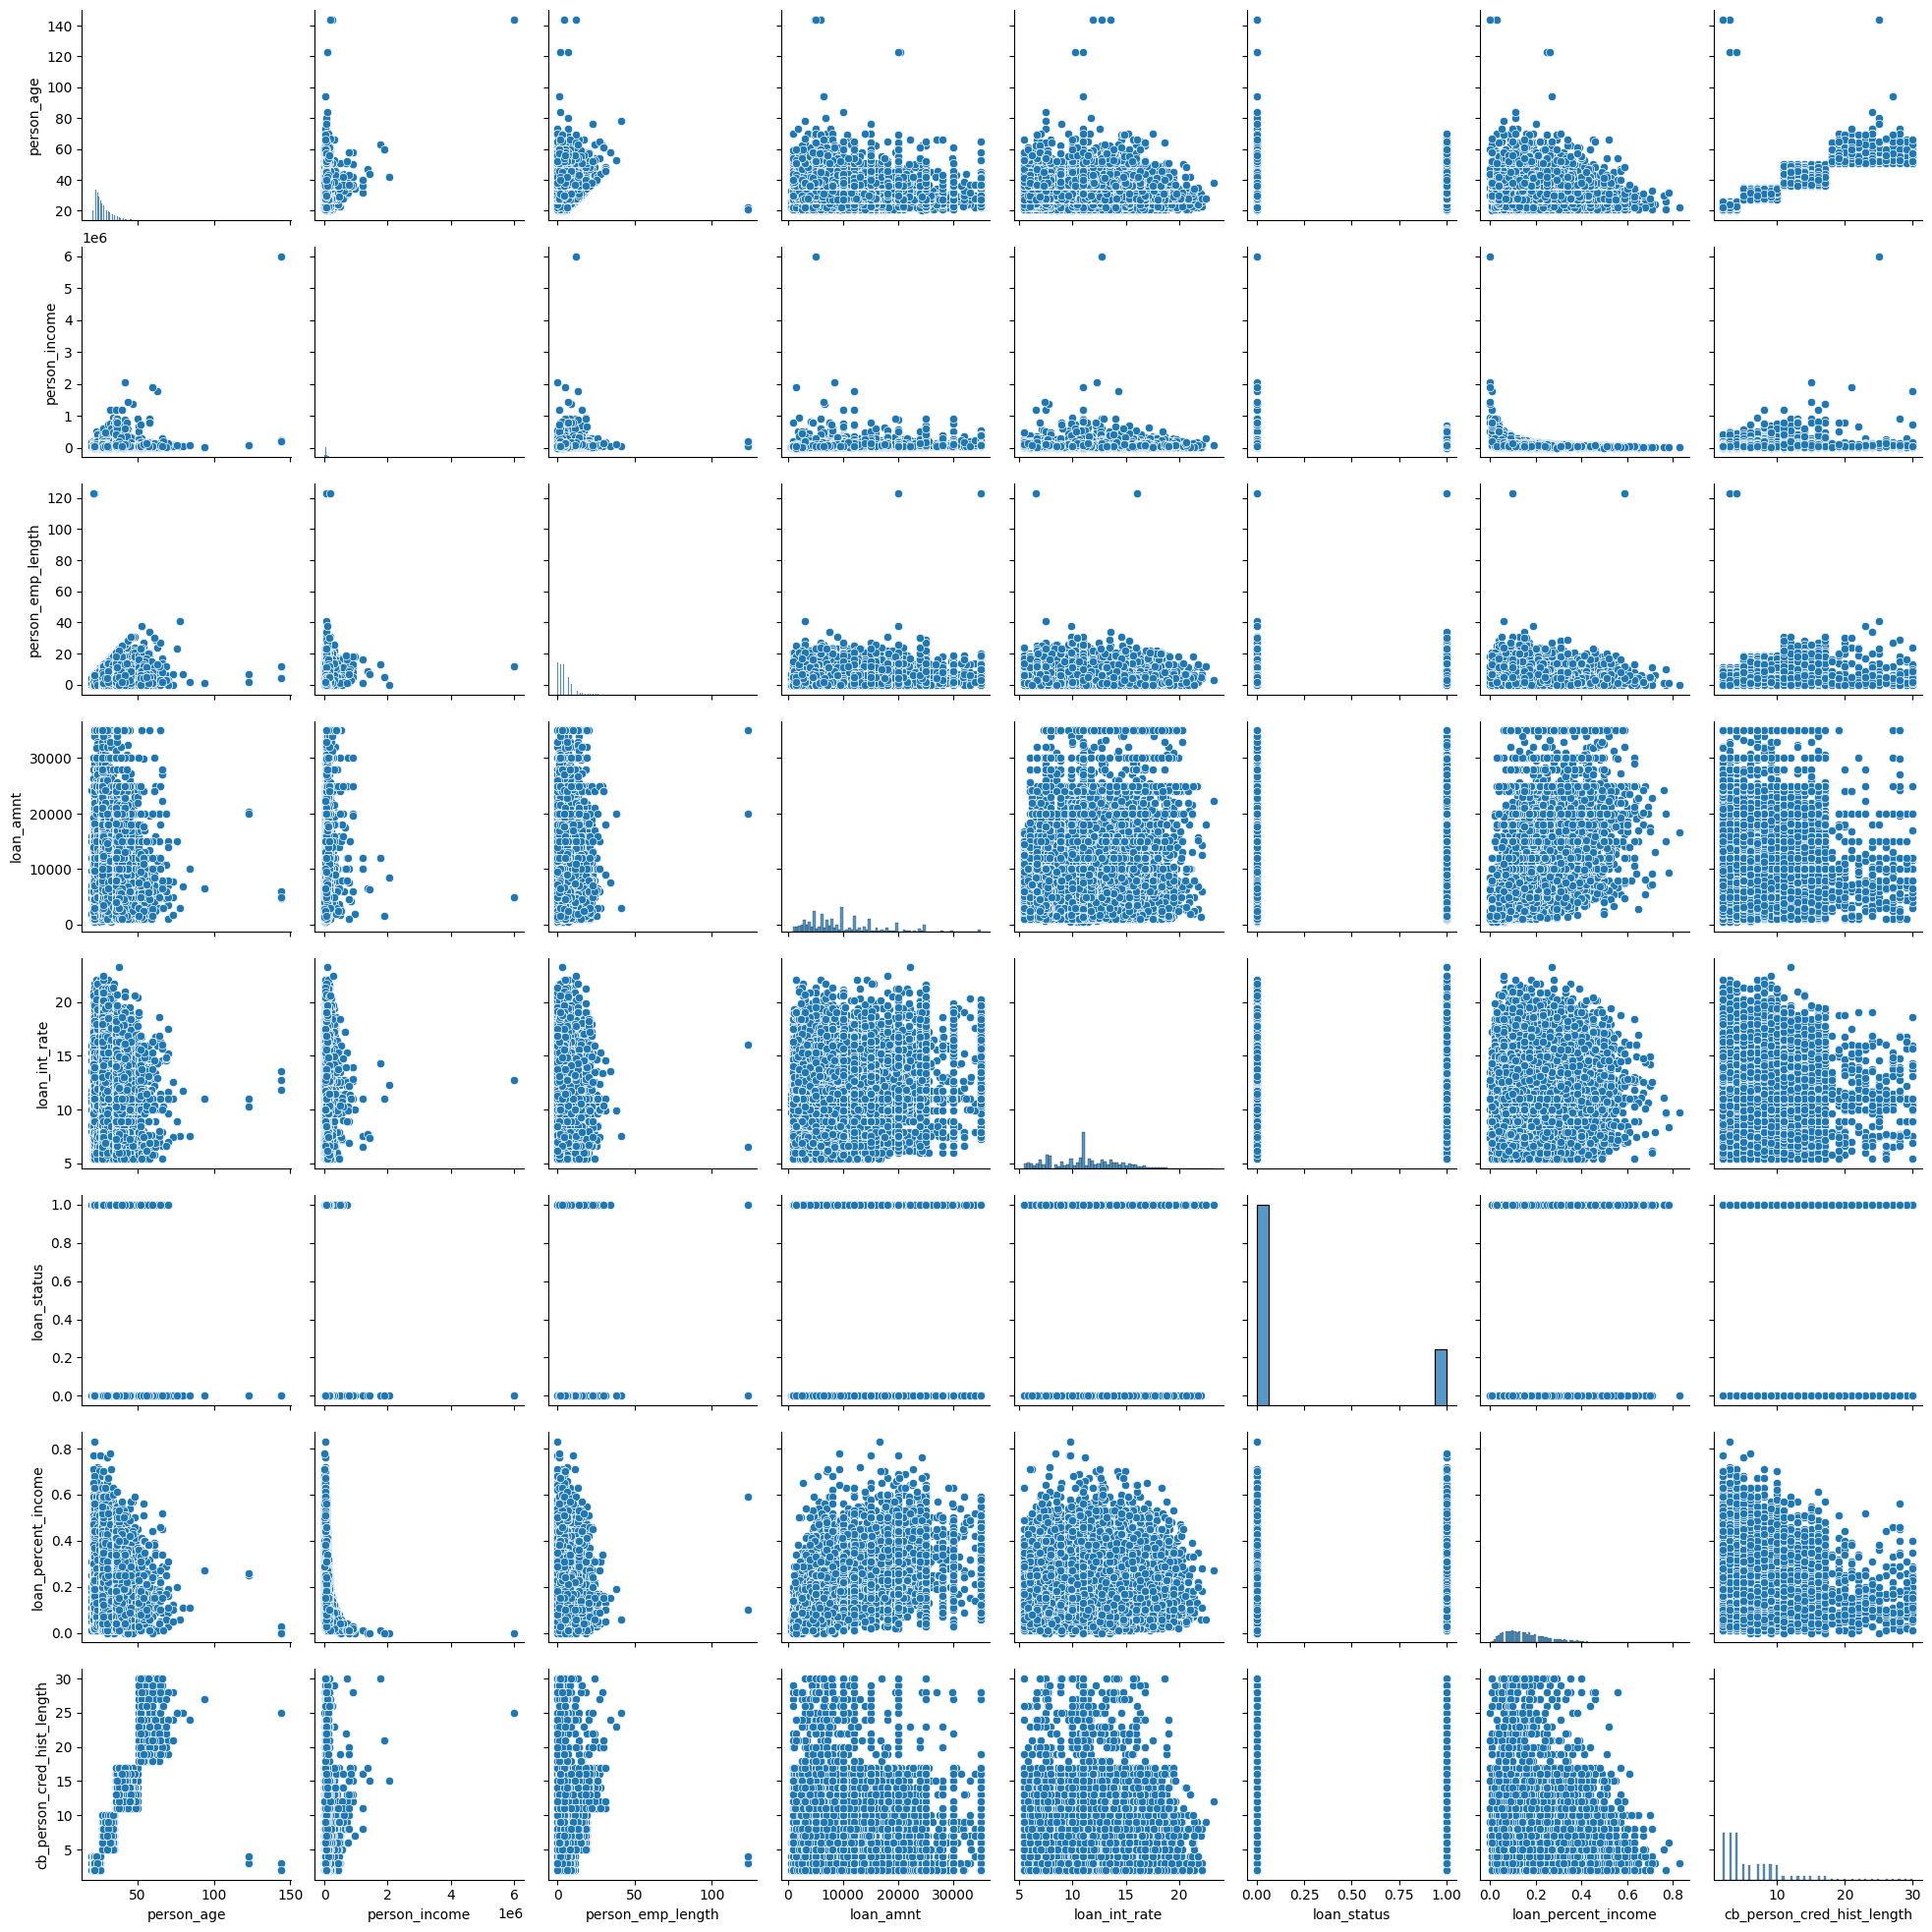

In [ ]:
sns.pairplot(data=num_col_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_col_df)

In [ ]:
scaled_num_col_df = pd.DataFrame(scaled_data, columns=num_col_df.columns)
scaled_num_col_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,-0.904471,-0.114354,28.904903,4.018287,1.622860,1.890164,3.929865,-0.692614
1,-1.061852,-0.910941,0.056504,-1.359219,0.039983,-0.529055,-0.657707,-0.938982
2,-0.432327,-0.910941,-0.921408,-0.647491,0.601126,1.890164,3.742617,-0.692614
3,-0.747089,-0.009540,-0.187974,4.018287,1.366616,1.890164,3.368121,-0.938982
4,-0.589708,-0.188530,0.789938,4.018287,1.055230,1.890164,3.555369,-0.446246
...,...,...,...,...,...,...,...,...
32411,4.603869,-0.211106,-0.921408,-0.600042,0.695190,-0.529055,-0.564083,5.959324
32412,4.131726,0.869285,-0.187974,1.270223,-1.143932,-0.529055,-0.189587,3.249275
32413,5.862918,0.159775,-0.432452,4.018287,-0.008671,1.890164,2.712754,5.466588
32414,4.446488,1.353041,0.056504,0.855048,0.150265,-0.529055,-0.657707,4.973852


In [ ]:
cat_col_df = df.drop(num_col_df, axis=1)
cat_col_df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [ ]:
one_hot_encoding_data = pd.get_dummies(cat_col_df, cat_col_df.columns, drop_first=True)
print(one_hot_encoding_data)

       person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            False                      False   
1                            False                       True   
2                            False                      False   
3                            False                      False   
4                            False                      False   
...                            ...                        ...   
32576                        False                      False   
32577                        False                      False   
32578                        False                      False   
32579                        False                      False   
32580                        False                      False   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
0                            True                  False   
1                           False                   True   
2                           False      

In [ ]:
new_df = pd.concat([one_hot_encoding_data, num_col_df], axis=1)
new_df

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,False,False,True,False,False,False,True,False,False,False,...,False,True,22,59000,123.0,35000,16.02,1,0.59,3
1,False,True,False,True,False,False,False,False,True,False,...,False,False,21,9600,5.0,1000,11.14,0,0.10,2
2,False,False,False,False,False,True,False,False,False,True,...,False,False,25,9600,1.0,5500,12.87,1,0.57,3
3,False,False,True,False,False,True,False,False,False,True,...,False,False,23,65500,4.0,35000,15.23,1,0.53,2
4,False,False,True,False,False,True,False,False,False,True,...,False,True,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,True,False,False,True,...,False,False,57,53000,1.0,5800,13.16,0,0.11,30
32577,False,False,False,False,False,False,True,False,False,False,...,False,False,54,120000,4.0,17625,7.49,0,0.15,19
32578,False,False,True,False,True,False,False,False,True,False,...,False,False,65,76000,3.0,35000,10.99,1,0.46,28
32579,False,False,False,False,False,False,True,False,True,False,...,False,False,56,150000,5.0,15000,11.48,0,0.10,26


In [ ]:
from sklearn.model_selection import train_test_split
X = new_db.drop(columns=[''])
y = new_db[['VE_%', 'EE_%', 'UE_%', 'power_cost_$', 'energy cost_$', 'total_cost_$']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")